HARIKRISHNAN.K
>B190485EC

>ECE-A

# **TWITTER**

In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt 

## IMPORTING AND PREPROCESSING

In [ ]:
from nltk.corpus import twitter_samples
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [ ]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [ ]:
ptwt = twitter_samples.strings('positive_tweets.json')
ntwt = twitter_samples.strings('negative_tweets.json')
all_twt = np.append(ptwt,ntwt)
labels = np.append(np.ones((len(ptwt))), np.zeros((len(ntwt))))

In [ ]:
tw_df = pd.DataFrame({'Tweets': all_twt , 'Label': labels}, columns=['Tweets', 'Label'])
tw_df['Label'] = tw_df['Label'].astype(int)
tw_df.head()

,Tweets,Label
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


In [ ]:
tw_df.dtypes

Tweets    object
Label      int64
dtype: object

In [ ]:
tw_df.columns=["text","target"]

In [ ]:
tw_df.head(10)

,text,target
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
5,@BhaktisBanter @PallaviRuhail This one is irre...,1
6,We don't like to keep our lovely customers wai...,1
7,"@Impatientraider On second thought, there’s ju...",1
8,"Jgh , but we have to go to Bayan :D bye",1
9,"As an act of mischievousness, am calling the E...",1


In [ ]:
tw_df.isnull().sum()

text      0
target    0
dtype: int64

In [ ]:
tw_df.dropna(inplace=True)

In [ ]:
tw_df['target'].unique()

array([1, 0])

In [ ]:
tw_df2 =tw_df.copy()

In [ ]:
tw_df2.head(5)

,text,target
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1


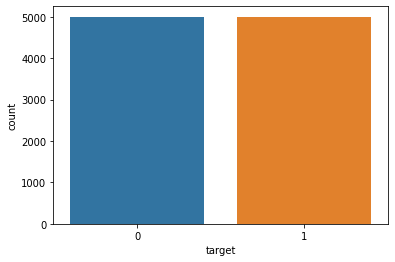

In [ ]:
# 0=> negative
# 1=> positive
import seaborn as sns
sns.countplot(x ='target', data = tw_df2)

In [ ]:
#Converting text to lowercase
def to_lower(x):
  return x.lower()
tw_df2['text']=tw_df2['text'].apply(to_lower)
tw_df2

,text,target
0,#followfriday @france_inte @pkuchly57 @milipol...,1
1,@lamb2ja hey james! how odd :/ please call our...,1
2,@despiteofficial we had a listen last night :)...,1
3,@97sides congrats :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
9995,i wanna change my avi but usanele :(,0
9996,my puppy broke her foot :(,0
9997,where's all the jaebum baby pictures :((,0
9998,but but mr ahmad maslan cooks too :( https://t...,0


In [ ]:
#Removing Punctuations
tw_df2["text"] = tw_df2['text'].str.replace('[^\w\s]','',regex=True)
tw_df2.head()

,text,target
0,followfriday france_inte pkuchly57 milipol_par...,1
1,lamb2ja hey james how odd please call our con...,1
2,despiteofficial we had a listen last night as...,1
3,97sides congrats,1
4,yeaaaah yippppy my accnt verified rqst has su...,1


In [ ]:
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
#Removing Stopwords
def stop_words(x):
  text=""
  for i in x.split():
     if i not in stopwords:
       text=text+" "+i
  return text
tw_df2['text'] = tw_df2['text'].apply(stop_words)
tw_df2

,text,target
0,followfriday france_inte pkuchly57 milipol_pa...,1
1,lamb2ja hey james odd please call contact cen...,1
2,despiteofficial listen last night bleed amazi...,1
3,97sides congrats,1
4,yeaaaah yippppy accnt verified rqst succeed g...,1
...,...,...
9995,wanna change avi usanele,0
9996,puppy broke foot,0
9997,wheres jaebum baby pictures,0
9998,mr ahmad maslan cooks httpstcoarcid31zv6,0


In [ ]:
tw_df2['text'].replace('', np.nan, inplace=True)
tw_df2.dropna(inplace=True)
tw_df2

,text,target
0,followfriday france_inte pkuchly57 milipol_pa...,1
1,lamb2ja hey james odd please call contact cen...,1
2,despiteofficial listen last night bleed amazi...,1
3,97sides congrats,1
4,yeaaaah yippppy accnt verified rqst succeed g...,1
...,...,...
9995,wanna change avi usanele,0
9996,puppy broke foot,0
9997,wheres jaebum baby pictures,0
9998,mr ahmad maslan cooks httpstcoarcid31zv6,0


In [ ]:
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
lemma = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# Lemmatizing
def lem(text):
  text=text.split()
  lemm=""
  for word in text:
    lemm=lemm+" "+lemma.lemmatize(word)
  return lemm

tw_df2['lemmatized'] = tw_df2['text'].apply(lem)
tw_df2.head()

,text,target,lemmatized
0,followfriday france_inte pkuchly57 milipol_pa...,1,followfriday france_inte pkuchly57 milipol_pa...
1,lamb2ja hey james odd please call contact cen...,1,lamb2ja hey james odd please call contact cen...
2,despiteofficial listen last night bleed amazi...,1,despiteofficial listen last night bleed amazi...
3,97sides congrats,1,97sides congrats
4,yeaaaah yippppy accnt verified rqst succeed g...,1,yeaaaah yippppy accnt verified rqst succeed g...


In [ ]:
tw_df2

,text,target,lemmatized
0,followfriday france_inte pkuchly57 milipol_pa...,1,followfriday france_inte pkuchly57 milipol_pa...
1,lamb2ja hey james odd please call contact cen...,1,lamb2ja hey james odd please call contact cen...
2,despiteofficial listen last night bleed amazi...,1,despiteofficial listen last night bleed amazi...
3,97sides congrats,1,97sides congrats
4,yeaaaah yippppy accnt verified rqst succeed g...,1,yeaaaah yippppy accnt verified rqst succeed g...
...,...,...,...
9995,wanna change avi usanele,0,wanna change avi usanele
9996,puppy broke foot,0,puppy broke foot
9997,wheres jaebum baby pictures,0,wheres jaebum baby picture
9998,mr ahmad maslan cooks httpstcoarcid31zv6,0,mr ahmad maslan cook httpstcoarcid31zv6


In [ ]:
from sklearn.model_selection import train_test_split
X = tw_df2['lemmatized']
Y = tw_df2['target']
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.30,random_state=45)

## MODELING AND TESTING

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 5,max_features=5000, ngram_range=(1,3),smooth_idf = True,norm='l2')
X_Train = tfidf.fit_transform(x_train)
X_Test = tfidf.transform(x_test)

In [ ]:
# Building Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
models = {
    MultinomialNB():'Multinomial Naive Bayes',
    LogisticRegression(max_iter=300):'Logistic Regression',
}
for i in models.keys():
    i.fit(X_Train,y_train)

In [ ]:
# Checking Accuracy
for model,name in models.items():
     print(f"Accuracy Score for {name} is : ",model.score(X_Test,y_test)*100,"%")

Accuracy Score for Multinomial Naive Bayes is :  73.84923282188124 %
Accuracy Score for Logistic Regression is :  73.78252168112076 %


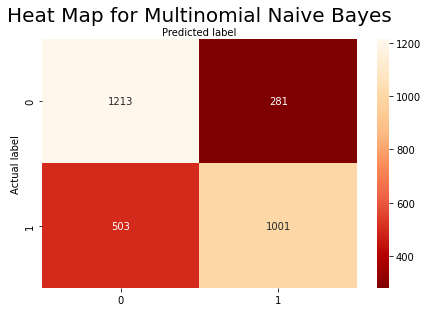

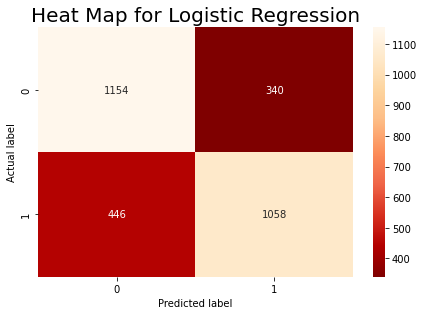

In [ ]:
# Ploting Heatmaps OR Confusion Matrix
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix,classification_report

class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)


for model,name in models.items():
    y_pred = model.predict(X_Test)
    cnf_matrix = confusion_matrix(y_test,y_pred)
    sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'OrRd_r',
            fmt = 'g')
    ax.xaxis.set_label_position('top')
    plt.tight_layout()
    plt.title(f'Heat Map for {name}', {'fontsize':20})
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Classification Report
for model,name in models.items():
    y_pred = model.predict(X_Test)
    print(f"Classification Report for {name}")  
    print("----------------------------------------------------------")
    print(classification_report(y_test,y_pred))
    print("----------------------------------------------------------")

Classification Report for Multinomial Naive Bayes
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.71      0.81      0.76      1494
           1       0.78      0.67      0.72      1504

    accuracy                           0.74      2998
   macro avg       0.74      0.74      0.74      2998
weighted avg       0.74      0.74      0.74      2998

----------------------------------------------------------
Classification Report for Logistic Regression
----------------------------------------------------------
              precision    recall  f1-score   support

           0       0.72      0.77      0.75      1494
           1       0.76      0.70      0.73      1504

    accuracy                           0.74      2998
   macro avg       0.74      0.74      0.74      2998
weighted avg       0.74      0.74      0.74      2998

----------------------------------------------------------
